# Look at some compounds from PubChem Substance

In [1]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
import rdkit
print(rdkit.__version__)

2021.03.1


In [13]:
import gzip
with gzip.open('/home/glandrum/T5/Data/Pubchem/Substance_000000001_000500000.sdf.gz') as inf:
    supplier = Chem.ForwardSDMolSupplier(inf,sanitize=False)
    failed_mols = []
    for m in supplier:
        cm = Chem.Mol(m)
        try:
            Chem.SanitizeMol(cm)
        except:
            failed_mols.append(m)
            if len(failed_mols)>100:
                break
len(failed_mols)

RDKit ERROR: [15:34:30] Explicit valence for atom # 8 N, 4, is greater than permitted
RDKit ERROR: [15:34:30] Explicit valence for atom # 8 N, 4, is greater than permitted
RDKit ERROR: [15:34:30] Explicit valence for atom # 6 N, 4, is greater than permitted
RDKit ERROR: [15:34:30] Explicit valence for atom # 6 N, 4, is greater than permitted
RDKit ERROR: [15:34:30] Explicit valence for atom # 17 H, 2, is greater than permitted
RDKit ERROR: [15:34:30] Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [15:34:30] Explicit valence for atom # 11 N, 4, is greater than permitted
RDKit ERROR: [15:34:30] Explicit valence for atom # 17 N, 4, is greater than permitted
RDKit ERROR: [15:34:30] Explicit valence for atom # 8 N, 4, is greater than permitted
RDKit ERROR: [15:34:30] Explicit valence for atom # 8 N, 4, is greater than permitted
RDKit ERROR: [15:34:30] Explicit valence for atom # 8 N, 4, is greater than permitted
RDKit ERROR: [15:34:30] Explicit valence for atom #

101

In [14]:
cms = [Chem.Mol(m) for m in failed_mols]
for cm in cms:
    cm.UpdatePropertyCache(strict=False)
    Chem.GetSymmSSSR(cm)

In [15]:
len(cms)

101

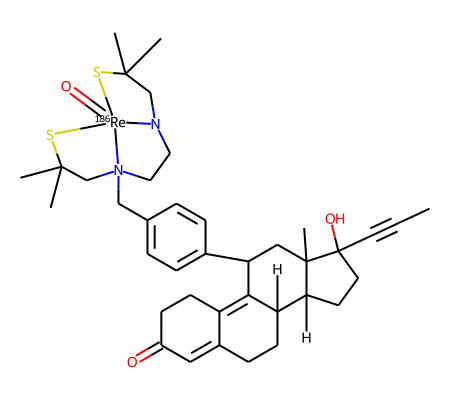

In [16]:
show_mol(3,cms)

In [17]:
from ipywidgets import interact,fixed
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG

@interact(idx=range(0,len(cms)),ms=fixed(cms))
def show_mol(idx,ms):
    d2d = rdMolDraw2D.MolDraw2DSVG(450,400)
    d2d.drawOptions().prepareMolsBeforeDrawing=False
    d2d.DrawMolecule(ms[idx])
    d2d.FinishDrawing()
    return SVG(d2d.GetDrawingText())

interactive(children=(Dropdown(description='idx', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1…

In [18]:
badAtoms = Chem.MolFromSmarts('[!$([#1,#3,#11,#19,#4,#12,#20,#5,#6,#14,#7,#15,#8,#16,#9,#17,#35,#53])]')

import gzip
with gzip.open('/home/glandrum/T5/Data/Pubchem/Substance_000000001_000500000.sdf.gz') as inf:
    supplier = Chem.ForwardSDMolSupplier(inf,sanitize=False)
    failed_mols = []
    for m in supplier:
        cm = Chem.Mol(m)
        if cm.HasSubstructMatch(badAtoms):
            continue
        try:
            Chem.SanitizeMol(cm)
        except:
            failed_mols.append(m)
            if len(failed_mols)>100:
                break
len(failed_mols)

RDKit ERROR: [15:37:09] Explicit valence for atom # 5 N, 4, is greater than permitted
RDKit ERROR: [15:37:09] Explicit valence for atom # 5 N, 4, is greater than permitted
RDKit ERROR: [15:37:09] Explicit valence for atom # 5 N, 4, is greater than permitted
RDKit ERROR: [15:37:09] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit WARNING: [15:37:09] Warning: conflicting stereochemistry at atom 20 ignored. by rule 1a.
RDKit WARNING: [15:37:09] Warning: conflicting stereochemistry at atom 20 ignored. by rule 1a.
RDKit ERROR: [15:37:09] Explicit valence for atom # 0 Cl, 7, is greater than permitted
RDKit ERROR: [15:37:10] Explicit valence for atom # 4 N, 4, is greater than permitted
RDKit ERROR: [15:37:12] Explicit valence for atom # 0 O, 3, is greater than permitted
RDKit ERROR: [15:37:14] Explicit valence for atom # 0 O, 3, is greater than permitted
RDKit ERROR: [15:37:14] Explicit valence for atom # 0 O, 4, is greater than permitted
RDKit ERROR: [15:37:15] Explicit va

74

In [24]:
#from rdkit import RDLogging
from rdkit import RDLogger
RDLogger.EnableLog('rdApp.*')
Chem.MolFromSmiles('CO(C)C')

RDKit ERROR: [15:42:40] Explicit valence for atom # 1 O, 3, is greater than permitted


In [19]:
cms = [Chem.Mol(m) for m in failed_mols]
for cm in cms:
    cm.UpdatePropertyCache(strict=False)
    Chem.GetSymmSSSR(cm)

RDKit WARNING: [15:37:50] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
RDKit WARNING: [15:37:50] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
RDKit WARNING: [15:37:50] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.


In [20]:
from ipywidgets import interact,fixed
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG
@interact(idx=range(0,len(cms)),ms=fixed(cms))
def show_mol(idx,ms):
    d2d = rdMolDraw2D.MolDraw2DSVG(450,400)
    d2d.drawOptions().prepareMolsBeforeDrawing=False
    d2d.DrawMolecule(ms[idx])
    d2d.FinishDrawing()
    return SVG(d2d.GetDrawingText())

interactive(children=(Dropdown(description='idx', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1…